In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score, recall_score,precision_score,cohen_kappa_score
import matplotlib

def display_performance():
    lgc = LogisticRegression()
    knnc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    nbc = GaussianNB()
    svc = SVC(kernel = 'linear')
    dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rfc = RandomForestClassifier(n_estimators=100, criterion = 'entropy')
    algo = ['Logistic Regression','K Nearest Neibhour','Naive Bayes','Support Vector Machines','Decision trees','Random Forest']
    performance_measure = ['Recall','Precision','Overall Accuracy','F1 Score','Cohen Kappa Score']
    models = [lgc,knnc,nbc,svc,dtc,rfc]
    accuracy_list = []
    f1_score_list = []
    recall_list = []
    precision_list = []
    cohen_kappa_list = []

    for i in range(0,6):
        models[i].fit(X_train,y_train)
        y_pred = models[i].predict(X_test)
        recall = recall_score(y_test,y_pred)
        recall_list.append(recall)
        precision = precision_score(y_test,y_pred)
        precision_list.append(precision)
        accuracy = accuracy_score(y_test,y_pred)
        accuracy_list.append(accuracy)
        f_score = f1_score(y_test,y_pred)
        f1_score_list.append(f_score)
        cohen = cohen_kappa_score(y_test,y_pred)
        cohen_kappa_list.append(cohen)
    
    df = pd.DataFrame([recall_list,precision_list,accuracy_list,f1_score_list,cohen_kappa_list])
    new_df = df.transpose()
    new_df.columns=performance_measure
    new_df.index=algo
    colors = ["bisque","ivory","sandybrown","steelblue","lightsalmon"]
    colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    background_color = "white"
    fig = plt.figure(figsize=(18,26)) # create figure
    gs = fig.add_gridspec(4, 2)
    gs.update(wspace=0.1, hspace=0.5)
    ax0 = fig.add_subplot(gs[0, :])
    sns.heatmap(new_df, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":16})
    fig.patch.set_facecolor(background_color) # figure background color
    ax0.set_facecolor(background_color) 
    ax0.text(0,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')
    plt.show()

In [3]:
df_fake = pd.read_csv('generated/results_get_fake_built.csv')
df_real = pd.read_csv('generated/results_get_real_built.csv')

cv = CountVectorizer(max_features = 2000)
X_fake = cv.fit_transform(df_fake['1']).toarray()
X_real = cv.fit_transform(df_real['1']).toarray()
X = np.append(X_fake, X_real, axis=0)

y_fake = df_fake['0']
y_real = df_real['0']
y = np.append(y_fake, y_real, axis=0)

X_train_fake, X_test_fake, y_train_fake, y_test_fake = train_test_split(X_fake, y_fake, test_size=0.3, random_state = 42)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3, random_state = 42)

X_train = np.append(X_train_fake, X_train_real, axis=0)
X_test = np.append(X_test_fake, X_test_real, axis=0)
y_train = np.append(y_train_fake, y_train_real, axis=0)
y_test = np.append(y_test_fake, y_test_real, axis=0)

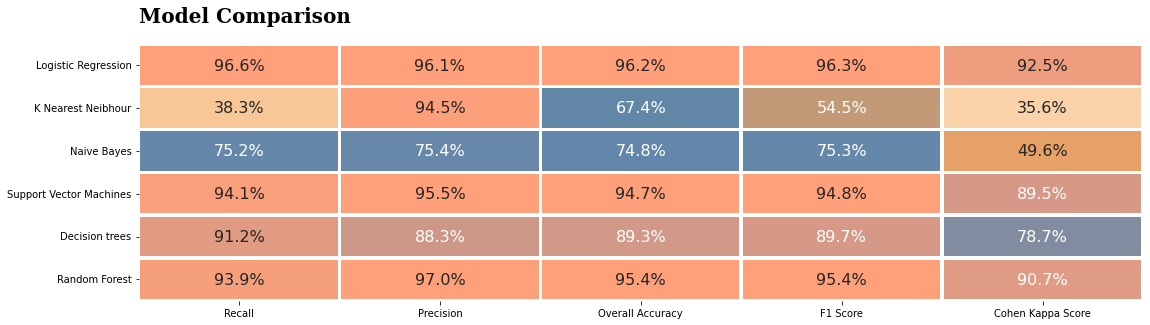

In [4]:
display_performance()

In [5]:
lgc = LogisticRegression()
lgc.fit(X_train,y_train)
y_pred = lgc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
cohen = cohen_kappa_score(y_test,y_pred)
print('Cohen Kappa Score',cohen)

[[375  16]
 [ 14 393]]
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       391
        True       0.96      0.97      0.96       407

    accuracy                           0.96       798
   macro avg       0.96      0.96      0.96       798
weighted avg       0.96      0.96      0.96       798

Cohen Kappa Score 0.9247742284173679
